In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [ ]:
pwd

'/content/drive/MyDrive/Kaggle'

In [ ]:
pip install pad_sequences


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=842211a4492d5a6541c8606ab54b40205363fbad2f16e7819191731075085cd8
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
import pad_sequences
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from gensim.models import Word2Vec
from numpy import asarray
from numpy import zeros
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import RegexpTokenizer
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
# general imports
import math
from bs4 import BeautifulSoup
import tensorflow as tf
import numpy as np
import skimage
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import missingno as msno

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
od.download("https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews")

Skipping, found downloaded files in "./amazon-alexa-reviews" (use force=True to force download)


In [ ]:
os.listdir()

['kaggle.json', 'amazon-alexa-reviews']

In [ ]:
%cd ./amazon-alexa-reviews/

/content/drive/MyDrive/Kaggle/amazon-alexa-reviews


In [ ]:
pwd

'/content/drive/MyDrive/Kaggle/amazon-alexa-reviews'

In [ ]:
ls

amazon_alexa.tsv


загружаем данные

In [ ]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [ ]:
df.shape

(3150, 5)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
#Duplicate Analysis
cols=df.columns
#print(list(cols))
dups_df = df.pivot_table(index=list(cols), aggfunc='size')
print (dups_df)

rating  date       variation    verified_reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        feedback
1       1-Jul-18   White        This item did not work. Certified refurbished should mean it works as advertised. Instead this item crashed as soon as I turned it on and plugged it in. When trying to connect from my phone to the echo dot, it crashed, over and over. Not only would it disconnect but the orange light would freeze and then the thing would reboot with the blue 

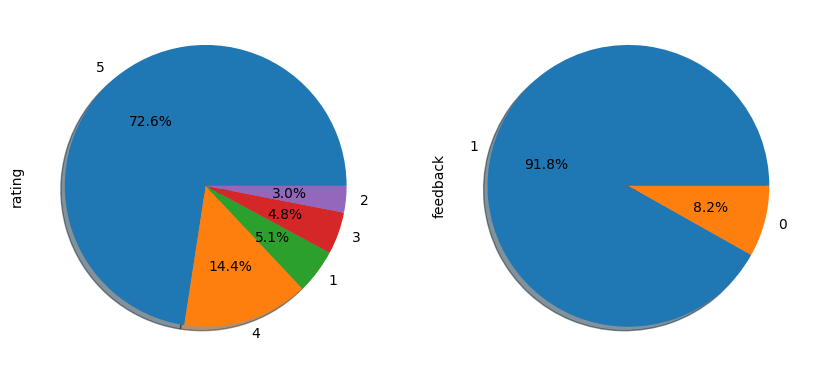

In [ ]:
#Explore Categorical Variables
cat_col = ['rating','feedback']

plt.figure(figsize=(10, 12))
count = 1
for cols in cat_col:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count +=1


Дубликатов не обнаружено

In [ ]:
# Find missing values
print("Colums with Null values: \n",df.isnull().sum())

Colums with Null values: 
 rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


Нулевых значений также нет

<Axes: >

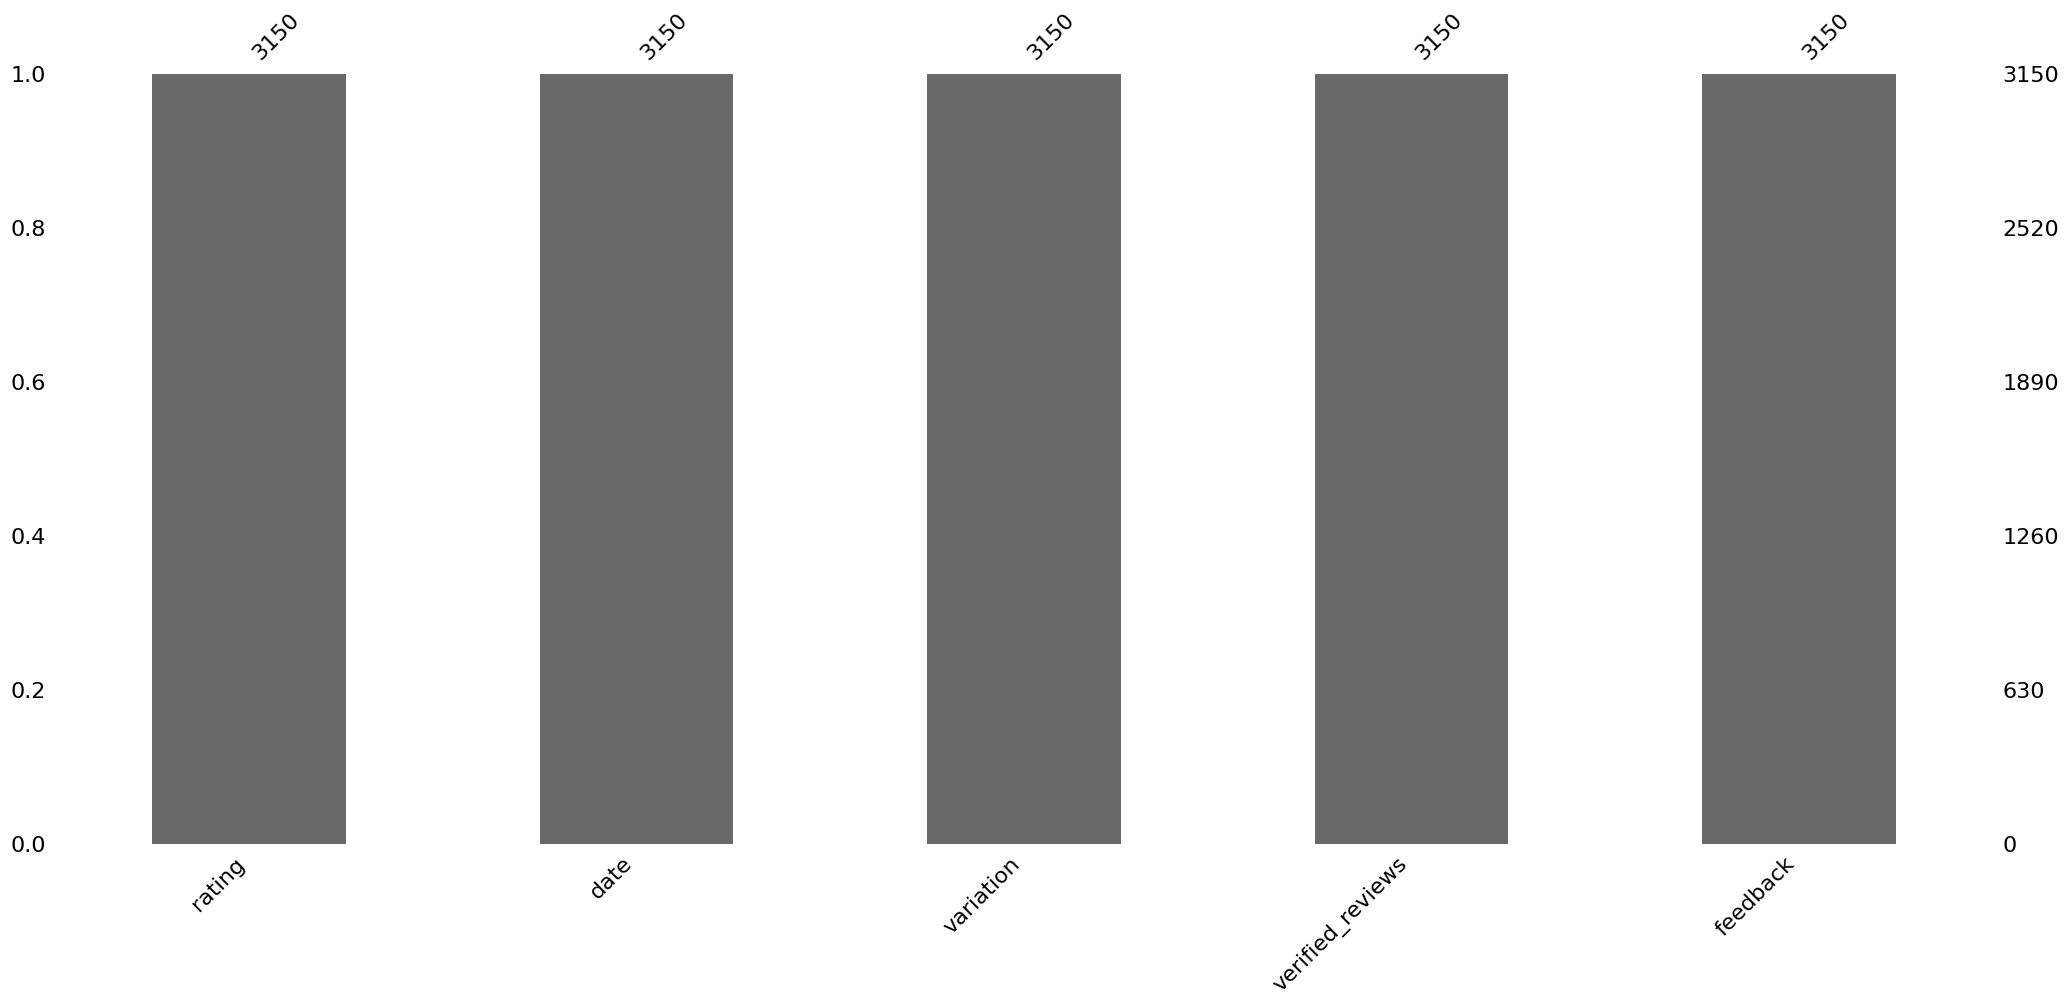

In [ ]:
msno.bar(df)

In [ ]:
#Variable - variation
#Find unique variation
len(df['variation'].unique())

16

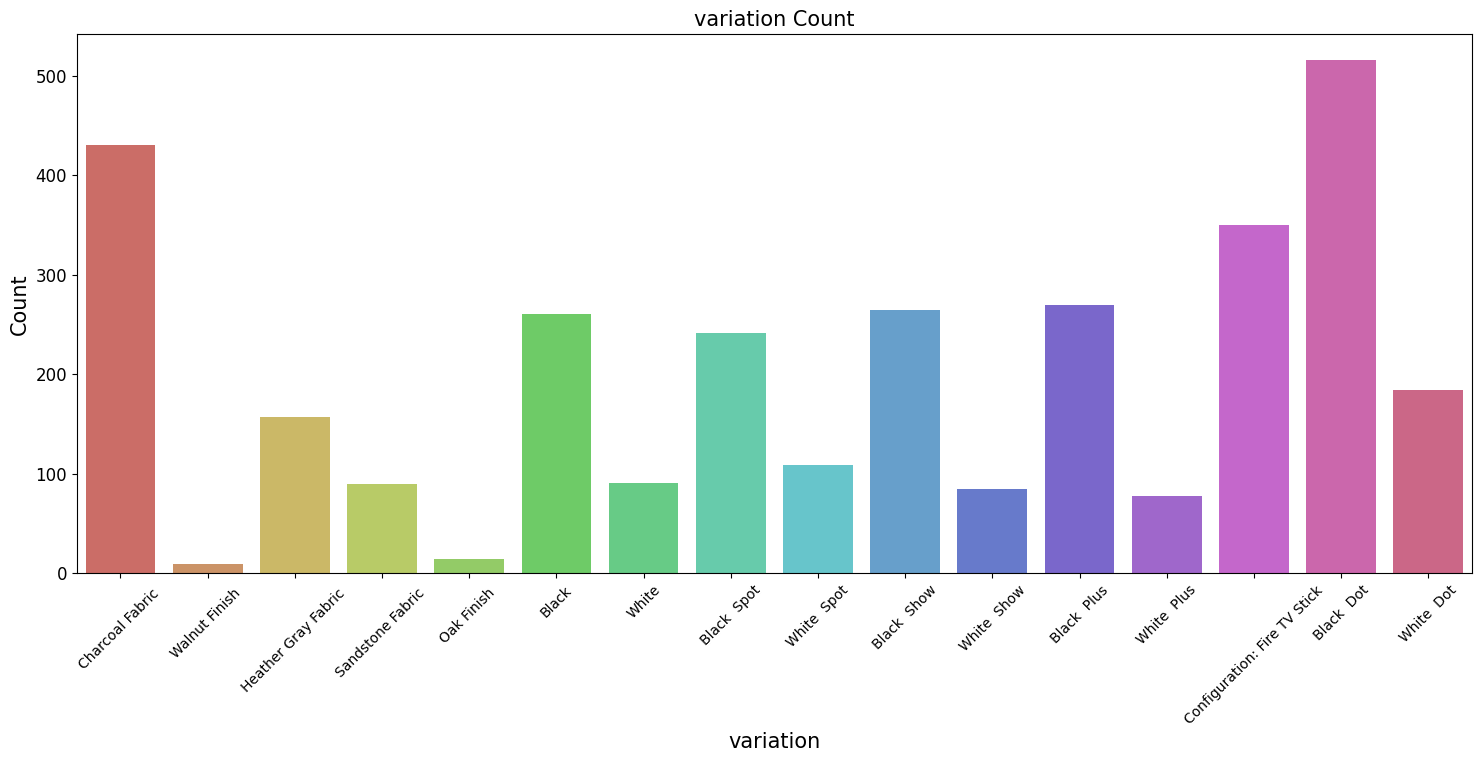

In [ ]:
#Plotting Variation
plt.figure(figsize=(18,7))
sns.countplot(x='variation', data=df, palette="hls")
plt.xlabel("variation", fontsize=15) #seting the xtitle and size
plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("variation Count", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Больше всего Black Dot и меньше всего Walnut finish

In [ ]:
# Lets check the reviews again
df['verified_reviews'].head(5)

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [ ]:
#Step 1: transform to lowercase
df['review_lw'] = df['verified_reviews'].str.lower()
df[['verified_reviews','review_lw']].head(10)

,verified_reviews,review_lw
0,Love my Echo!,love my echo!
1,Loved it!,loved it!
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,Music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ..."
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...
8,looks great,looks great
9,Love it! I’ve listened to songs I haven’t hear...,love it! i’ve listened to songs i haven’t hear...


In [ ]:
#Step 2: Removing HTML Tags
df['review_lw'] = df['review_lw'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())

df[['verified_reviews','review_lw']].head(10)

<ipython-input-27-e0774d06d3a4>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['review_lw'] = df['review_lw'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())
<ipython-input-27-e0774d06d3a4>:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  df['review_lw'] = df['review_lw'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())


,verified_reviews,review_lw
0,Love my Echo!,love my echo!
1,Loved it!,loved it!
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,Music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ..."
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...
8,looks great,looks great
9,Love it! I’ve listened to songs I haven’t hear...,love it! i’ve listened to songs i haven’t hear...


In [ ]:
#Step 3: remove stopwords 'n punctuation
sw = stopwords.words('english')

In [ ]:
def transform_text(s):

    # remove html
    html=re.compile(r'<.*?>')
    s = html.sub(r'',s)

    # remove numbers
    s = re.sub(r'\d+', '', s)

    # remove punctuation
    # remove stopwords
    tokens = nltk.word_tokenize(s)

    new_string = []
    for w in tokens:
        # remove words with len = 2 AND stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)

    s = ' '.join(new_string)
    s = s.strip()

    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)

    return s.strip()


In [ ]:
df['review_sw'] = df['review_lw'].apply(transform_text)
df[['verified_reviews','review_lw', 'review_sw']].head(10)

,verified_reviews,review_lw,review_sw
0,Love my Echo!,love my echo!,love echo
1,Loved it!,loved it!,loved
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,lot fun thing old learns dinosaurs control lig...
4,Music,music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...,received echo gift needed another bluetooth so...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ...",without cellphone use many features ipad see u...
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...,think one ve purchased working getting one eve...
8,looks great,looks great,looks great
9,Love it! I’ve listened to songs I haven’t hear...,love it! i’ve listened to songs i haven’t hear...,love listened songs heard since childhood get ...


In [ ]:
#Step 4: lemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)

    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)

    s = ' '.join(new_string)
    return s.strip()

In [ ]:
df['review_lm'] = df['review_sw'].apply(lemmatizer_text)
df[['verified_reviews','review_lw', 'review_sw', 'review_lm']].head(20)

,verified_reviews,review_lw,review_sw,review_lm
0,Love my Echo!,love my echo!,love echo,love echo
1,Loved it!,loved it!,loved,love
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...",sometimes playing game answer question correct...,sometimes play game answer question correctly ...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,lot fun thing old learns dinosaurs control lig...,lot fun thing old learn dinosaurs control ligh...
4,Music,music,music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...,received echo gift needed another bluetooth so...,receive echo gift need another bluetooth somet...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ...",without cellphone use many features ipad see u...,without cellphone use many feature ipad see us...
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...,think one ve purchased working getting one eve...,think one purchase work get one every room hou...
8,looks great,looks great,looks great,look great
9,Love it! I’ve listened to songs I haven’t hear...,love it! i’ve listened to songs i haven’t hear...,love listened songs heard since childhood get ...,love listen songs hear since childhood get new...


In [ ]:
#Step 5: Removing Rare Words
text = ' '.join(df['review_lm'])
len(text)

241044

In [ ]:
# Creating Frequency
text_series = pd.Series(text.split())
freq_comm = text_series.value_counts()
freq_comm

love           1060
echo            858
great           720
use             681
work            648
               ... 
spectacular       1
feed              1
argument          1
consumer          1
adept             1
Length: 3222, dtype: int64

In [ ]:
rare_words = freq_comm[-1266:-1]
'rattlecrackle' in rare_words

True

In [ ]:
rare_words

mint           1
revise         1
successful     1
pray           1
devicei        1
              ..
stellar        1
spectacular    1
feed           1
argument       1
consumer       1
Length: 1265, dtype: int64

In [ ]:
# Removing 1266 rare occuring words
df['review_lm'] = df['review_lm'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))
df['review_lm'].sample(5)

19      like original echo shorter greater fabriccolor...
876                                            alexa rock
2284    work great lag much better gen devices use wou...
432                                                 thank
2202                              perfect work like charm
Name: review_lm, dtype: object

In [ ]:
text = ' '.join(df['review_lm'])
len(text)

230489

Wordcloud for feedback == 1

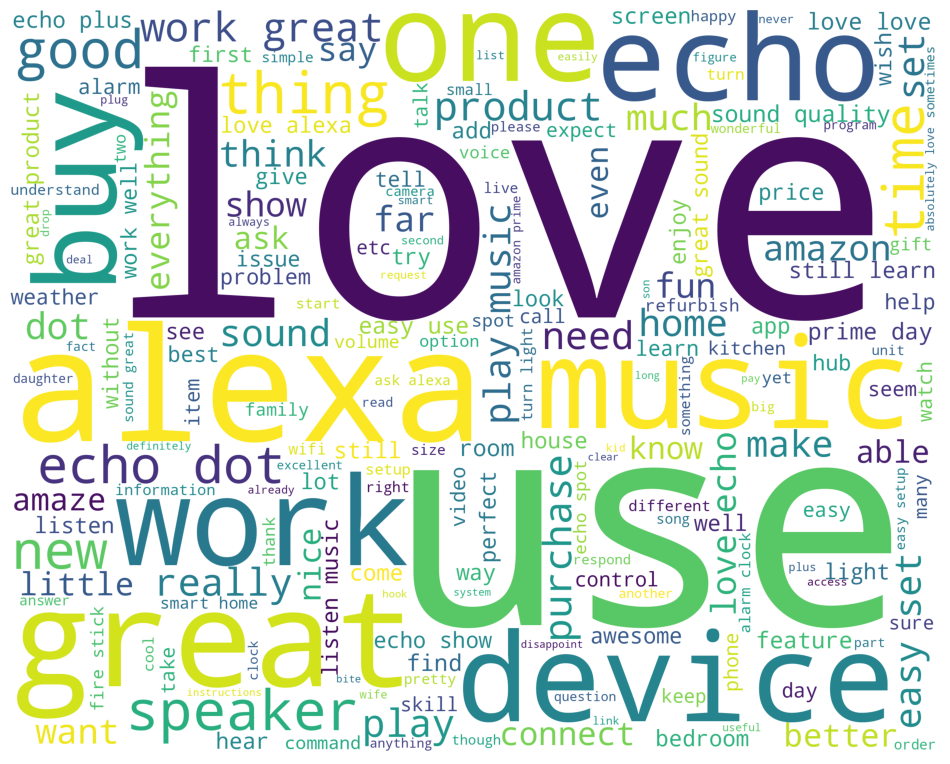

In [ ]:
df_pos = df[df['feedback']==1]['review_lm']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()


Wordcloud for feedback == 0

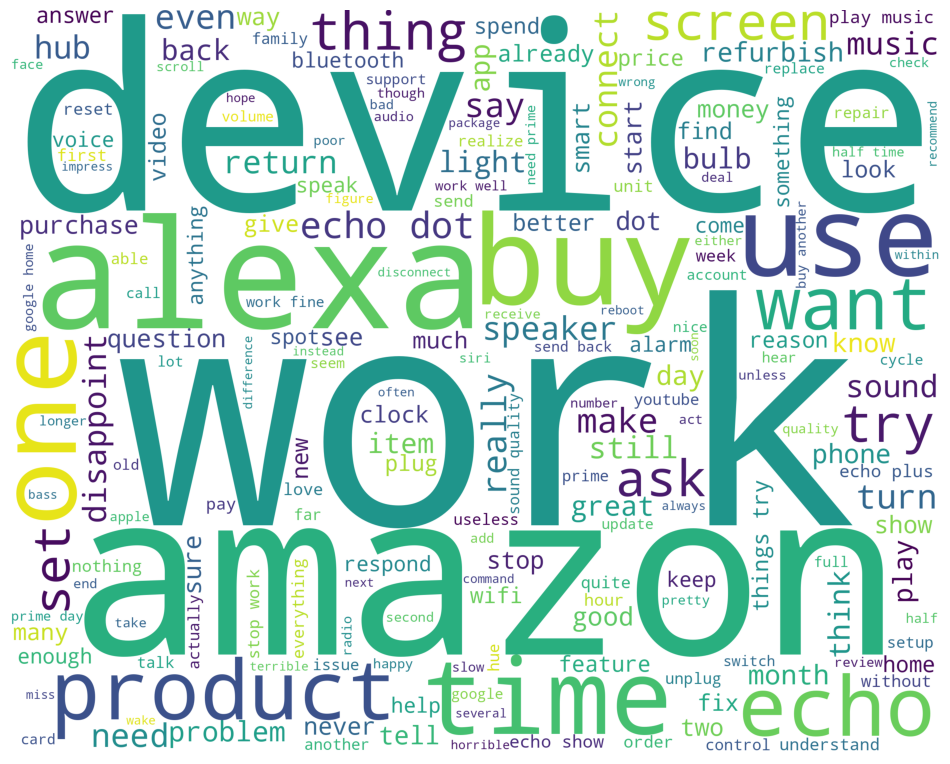

In [ ]:
df_neg = df[df['feedback']==0]['review_lm']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
def plot_ngram(sentiment, n):
    print("sentiment",sentiment)
    temp_df = df[df['feedback'] == sentiment]

    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['review_lm'])

    frequencies = sum(sparse_matrix).toarray()[0]

    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

In [ ]:
# For Feedback=1
plot_ngram(1, 1)

sentiment 1


,index,frequency
0,love,1051
1,echo,766
2,great,702
3,use,633
4,alexa,572
5,work,546
6,music,505
7,like,483
8,get,429
9,sound,390


In [ ]:
plot_ngram(0, 1)

sentiment 0


,index,frequency
0,work,102
1,echo,92
2,get,68
3,amazon,61
4,would,58
5,buy,57
6,alexa,54
7,device,54
8,time,50
9,use,48


In [ ]:
#Feedback=1 (i.e. +ve)
df[df['feedback']== 1]['review_lm'].count()

2893

In [ ]:
#Feedback=0 (i.e. -ve)
df[df['feedback']== 0]['review_lm'].count()

257

Train and test dataset

Feeedback=1 : Total 2893
we can use the first 2025(70%) for training and 868(30%) remaining for testing
i.e. 2893=2025+868
Feeedback=0 : Total 257
we can use the first 180(70%) for training and 77(30%) remaining for testing
i.e. 257=180+77

In [ ]:
# Train dataset
pos_train = df[df['feedback']==1][['review_lm', 'feedback']].head(2025)
neg_train = df[df['feedback']==0][['review_lm', 'feedback']].head(180)


# Test dataset
pos_test = df[df['feedback']==1][['review_lm', 'feedback']].tail(868)
neg_test = df[df['feedback']==0][['review_lm', 'feedback']].tail(77)

In [ ]:
# put all toghether
train_df = pd.concat([pos_train, neg_train]).sample(frac = 1).reset_index(drop=True)
test_df = pd.concat([pos_test, neg_test]).sample(frac = 1).reset_index(drop=True)

In [ ]:
train_df.head()

,review_lm,feedback
0,echo show white great new addition alexa home ...,1
1,know need plug work far experience positive,1
2,love talk box able easily set,1
3,love much,1
4,original alexa tap far generation best happy s...,1


In [ ]:
test_df.head()

,review_lm,feedback
0,second echo purchase price cheap seriously thi...,1
1,good,1
2,easy install use,1
3,handy hell recommend,1
4,love,1


In [ ]:
X_train = train_df['review_lm']
X_test  = test_df['review_lm']
y_train = train_df['feedback']
y_test  = test_df['feedback']

In [ ]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train)
X_train_onehot = vectorizer.transform(X_train)
X_test_onehot = vectorizer.transform(X_test)

#print shape post encoding
print(X_train_onehot.shape)
print(X_test_onehot.shape)

(2205, 1760)
(945, 1760)


In [ ]:
#Let's have a look at 10 words from the word vocabulary
#with their corresponding indices in the vocabulary.
word_dict = vectorizer.vocabulary_
print({k: word_dict[k] for k in list(word_dict)[:20]})

{'echo': 484, 'show': 1389, 'white': 1718, 'great': 690, 'new': 1022, 'addition': 24, 'alexa': 49, 'home': 741, 'solution': 1430, 'call': 230, 'back': 136, 'video': 1672, 'chat': 265, 'directly': 447, 'phone': 1134, 'way': 1697, 'stay': 1482, 'touch': 1594, 'family': 578, 'know': 855}


In [ ]:
# Generic function for model building
def fit_and_test(classifier, X_train, y_train, X_test, y_test, only_return_accuracy=False):
  classifier.fit(X_train, y_train)
  y_hat = classifier.predict(X_test)
  print('accuracy:', accuracy_score(y_test, y_hat))
  if not only_return_accuracy:
    print('f1_score:', f1_score(y_test, y_hat))

In [ ]:
#Logistic Regression
#grid search over regularisation hyperparameter 'c'
for c in [0.01, 0.02, 0.05, 0.25, 0.5, 0.75, 1,]:
  lr = LogisticRegression(C=c, max_iter=1000) # 92.91%
  print (f'At C = {c}:-', end=' ')
  fit_and_test(lr, X_train_onehot, y_train, X_test_onehot, y_test, True)

At C = 0.01:- accuracy: 0.9185185185185185
At C = 0.02:- accuracy: 0.9185185185185185
At C = 0.05:- accuracy: 0.9185185185185185
At C = 0.25:- accuracy: 0.9227513227513228
At C = 0.5:- accuracy: 0.9227513227513228
At C = 0.75:- accuracy: 0.926984126984127
At C = 1:- accuracy: 0.9291005291005291


Запустим логистическую регрессию с гиперпараметром C = 1, так как при этом значении параметра алгоритм выдает наилучшие значения accuracy

In [ ]:
#Make an instance of the model
logistic = LogisticRegression(C=1,max_iter=10000)
#fitting the values for x and y
logistic.fit(X_train_onehot,y_train)

LogisticRegression(C=1, max_iter=10000)

In [ ]:
#predictions from test data
prediction = logistic.predict(X_test_onehot)

Text(113.9222222222222, 0.5, 'Predicted')

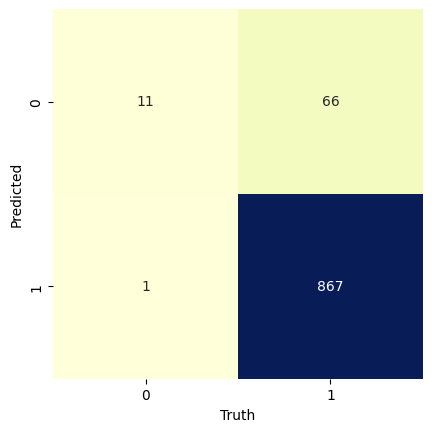

In [ ]:
###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix
cm_lgr1 = confusion_matrix(y_test,prediction)
names = np.unique(prediction)
sns.heatmap(cm_lgr1, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

###### Confusion matrix ends ########

In [ ]:
#calculating the accuracy
accuracy_score = accuracy_score(y_test,prediction)
print("Accuracy of  Logistic Regression :",accuracy_score)

Accuracy of  Logistic Regression : 0.9291005291005291


Простая логистическая регрессия достигает 93% точности при значении гиперпараметра C=1 (Только 67 примеров из 945 были определены ошибочно)

Выведем n-граммы и frequency

In [ ]:
################ Print n-grams and frequency starts #################
vectorizer = CountVectorizer()
vect_texts = vectorizer.fit_transform(list(df['review_lm']))

all_ngrams = vectorizer.get_feature_names_out()
#print(all_ngrams[:5])
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

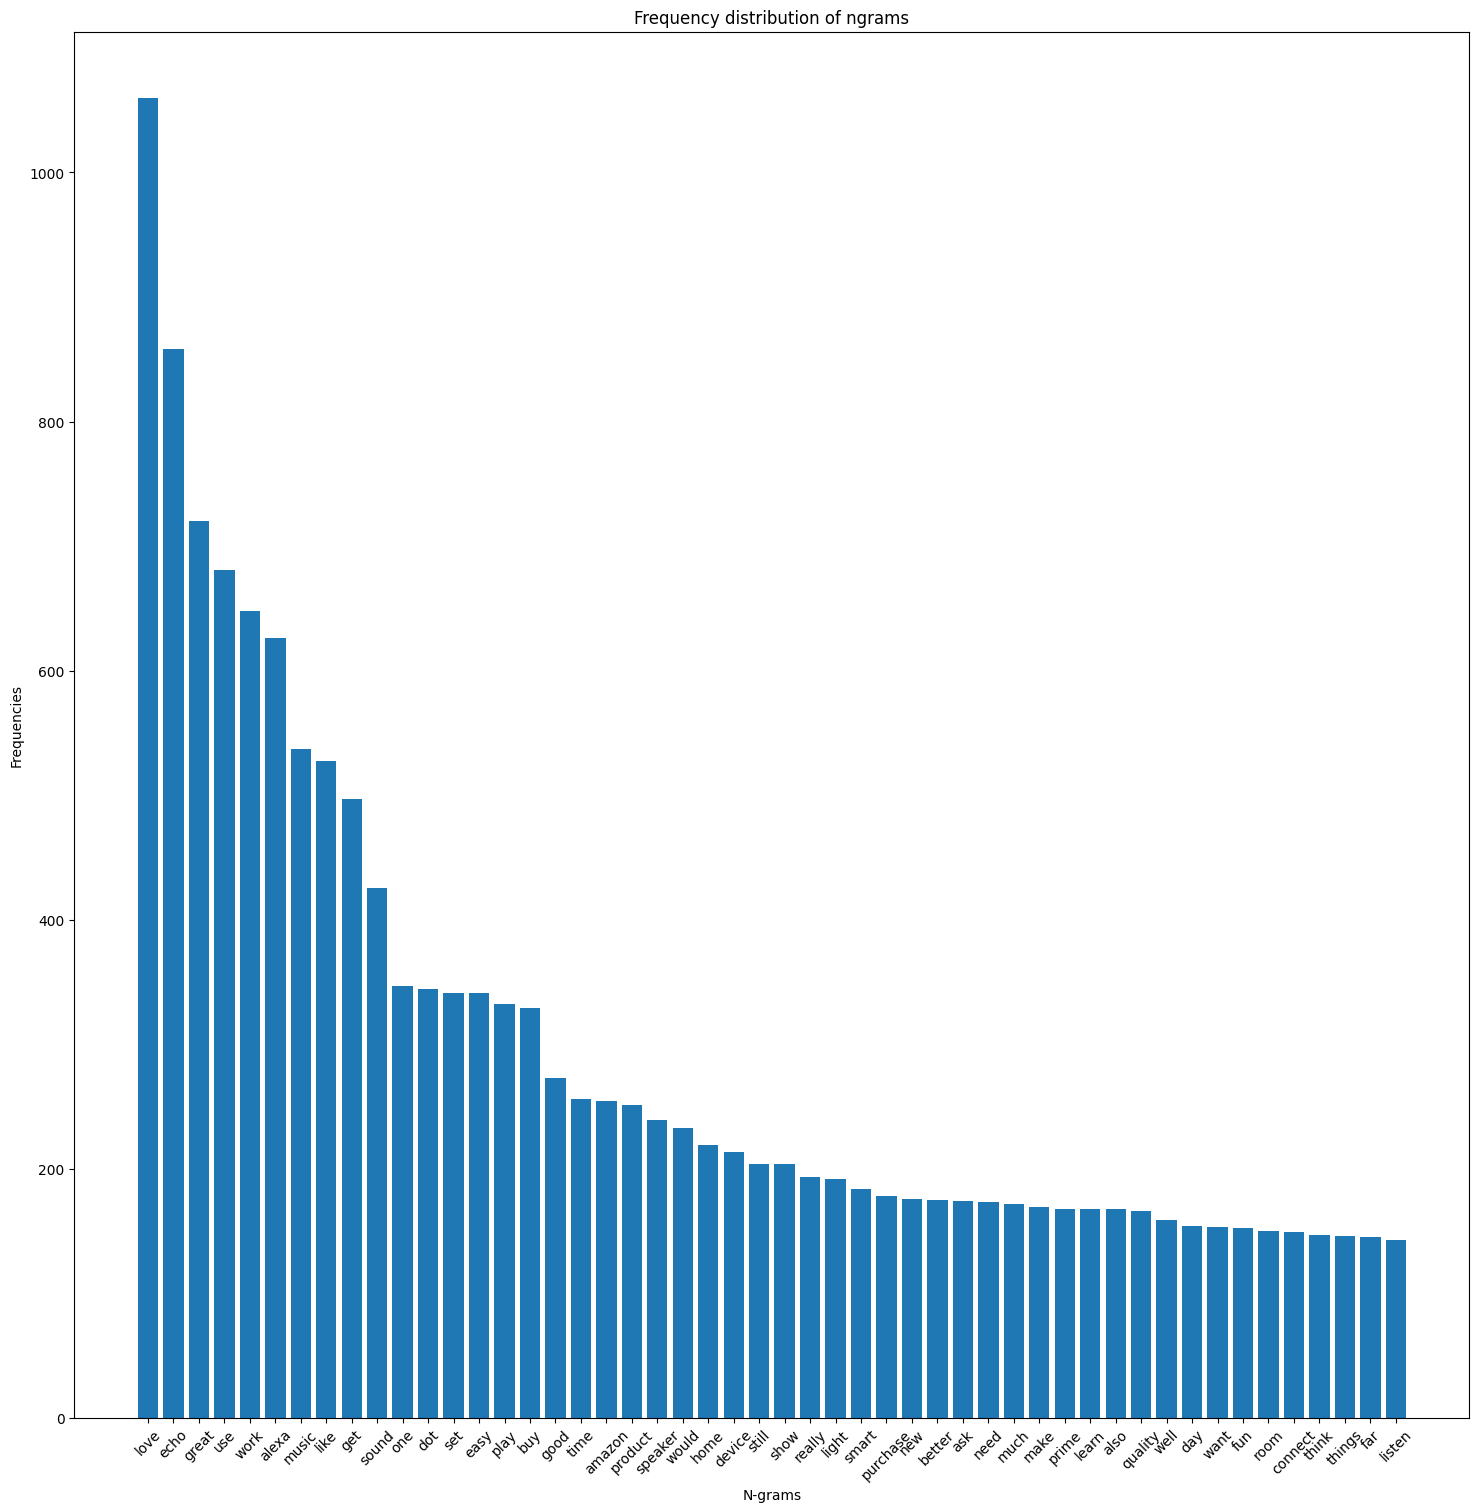

In [ ]:
# Let's plot a frequency distribution plot for the most seen words
plt.figure(figsize=(18, 18))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

Keras with batch normalisation with mode=count

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from keras.layers import Embedding

In [ ]:
# create the tokenizer
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
Xtrain = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
Xtest = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = Xtest.shape[1]

print("n_words1", n_words1)

n_words1 1763


In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(256, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]


history = model.fit(Xtrain, y_train,
                    epochs=20,
                    validation_data=(Xtest, y_test,),
                    verbose=1,
                    callbacks=callbacks,
                   )

Epoch 1/20
69/69 [==============================] - 9s 9ms/step - loss: 0.9695 - acc: 0.5224 - val_loss: 0.6158 - val_acc: 0.9079
Epoch 2/20
69/69 [==============================] - 0s 6ms/step - loss: 0.8576 - acc: 0.5755 - val_loss: 0.5548 - val_acc: 0.9185
Epoch 3/20
69/69 [==============================] - 1s 8ms/step - loss: 0.7808 - acc: 0.6181 - val_loss: 0.5093 - val_acc: 0.9196
Epoch 4/20
69/69 [==============================] - 1s 8ms/step - loss: 0.7120 - acc: 0.6440 - val_loss: 0.4747 - val_acc: 0.9175
Epoch 5/20
69/69 [==============================] - 0s 6ms/step - loss: 0.6614 - acc: 0.6658 - val_loss: 0.4519 - val_acc: 0.9185
Epoch 6/20
69/69 [==============================] - 1s 8ms/step - loss: 0.6331 - acc: 0.6834 - val_loss: 0.4381 - val_acc: 0.9122
Epoch 7/20
69/69 [==============================] - 1s 9ms/step - loss: 0.5910 - acc: 0.7229 - val_loss: 0.4232 - val_acc: 0.9069
Epoch 8/20
69/69 [==============================] - 1s 10ms/step - loss: 0.5349 - acc: 0.7

In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):

    y_pred = clf_object.predict(X_test)
    return y_pred

In [ ]:
predictions_keras = prediction(Xtest, model)

30/30 [==============================] - 0s 2ms/step


In [ ]:
pred_ann = [ 1 if y>=0.5 else 0 for y in predictions_keras]

In [ ]:
#calculating the accuracy
accuracy_score = accuracy_score(y_test, pred_ann)
print("Accuracy score with Keras:",accuracy_score)

Accuracy score with Keras: 0.9248677248677248


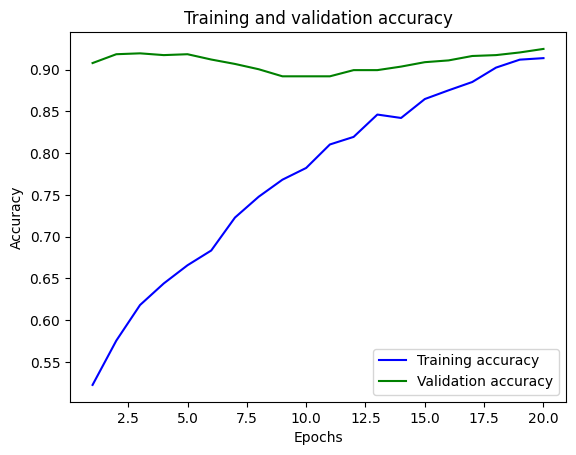

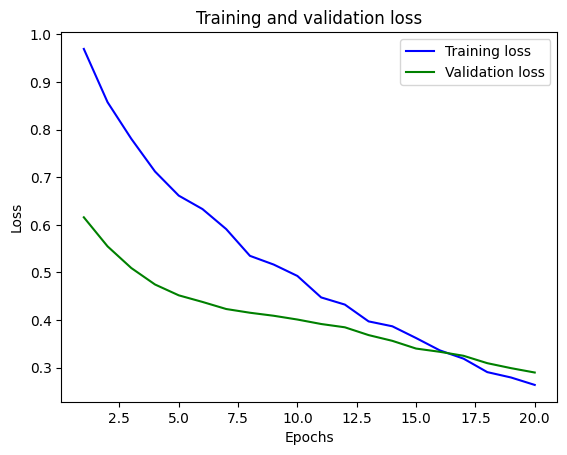

In [ ]:
def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(accuracy) + 1)

    # Plot accuracy
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

Text(113.9222222222222, 0.5, 'Predicted')

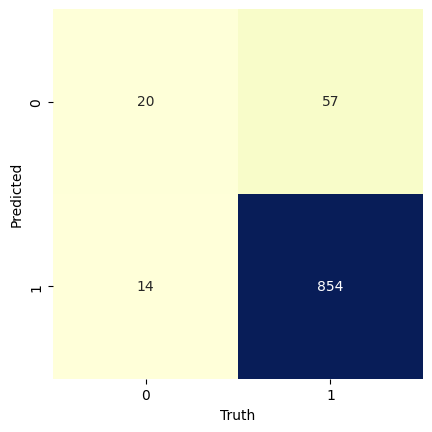

In [ ]:
###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix
cm_ann = confusion_matrix(y_test,pred_ann)
names = np.unique(pred_ann)
sns.heatmap(cm_ann, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
###### Confusion matrix ends ########

Embedding Layer with CNN

In [ ]:
# create the tokenizer
tokenizer = Tokenizer()

# fit the tokenizer on the train documents
tokenizer.fit_on_texts(X_train)

In [ ]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(X_train)
# pad sequences
max_length = max([len(s.split()) for s in X_train])
Xtrain = tf.keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [ ]:
# fit the tokenizer on the test documents
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(X_test)
# pad sequences
Xtest = tf.keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [ ]:
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size = ",vocab_size)

vocab_size =  1763


In [ ]:
# define model

model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 230, 100)          176300    
                                                                 
 conv1d (Conv1D)             (None, 223, 32)           25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 111, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3552)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                35530     
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                      

In [ ]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, y_train, epochs=10, verbose=1)

Epoch 1/10
69/69 [==============================] - 19s 191ms/step - loss: 0.3393 - accuracy: 0.9075
Epoch 2/10
69/69 [==============================] - 9s 126ms/step - loss: 0.2715 - accuracy: 0.9184
Epoch 3/10
69/69 [==============================] - 6s 80ms/step - loss: 0.1914 - accuracy: 0.9184
Epoch 4/10
69/69 [==============================] - 5s 77ms/step - loss: 0.1187 - accuracy: 0.9252
Epoch 5/10
69/69 [==============================] - 3s 43ms/step - loss: 0.0972 - accuracy: 0.9678
Epoch 6/10
69/69 [==============================] - 3s 45ms/step - loss: 0.0827 - accuracy: 0.9760
Epoch 7/10
69/69 [==============================] - 1s 22ms/step - loss: 0.0776 - accuracy: 0.9832
Epoch 8/10
69/69 [==============================] - 1s 19ms/step - loss: 0.0754 - accuracy: 0.9855
Epoch 9/10
69/69 [==============================] - 2s 28ms/step - loss: 0.0716 - accuracy: 0.9868
Epoch 10/10
69/69 [==============================] - 2s 30ms/step - loss: 0.0693 - accuracy: 0.9896


In [ ]:
# evaluate
loss, acc = model.evaluate(Xtest, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 92.910051


In [ ]:
token = Tokenizer(num_words=5000)
##### Hyperparamaters
vocab_size = len(token.word_index) +  1
maxlen = 230

In [ ]:
def preprocess(text):
    text = token.texts_to_sequences(text)
    text =  tf.keras.preprocessing.sequence.pad_sequences(text,padding='pre',maxlen=maxlen)
    return text

In [ ]:
def predict(text):
    text = preprocess(text)
    pred = model.predict(text)
    return pred

In [ ]:
predict(["like siri fact siri answers accurately alexa see real need household though good bargain prime day deals"])

1/1 [==============================] - 0s 143ms/step


array([[0.72224116]], dtype=float32)

In [ ]:
predict(["bad alexa need fix useless"])

1/1 [==============================] - 0s 56ms/step


array([[0.72224116]], dtype=float32)